# Theory: Support Vector Machines (SVM) 🚀🔍

Support Vector Machines (SVM) are powerful and versatile machine learning algorithms used for both classification and regression tasks. They're like the "superheroes" of machine learning, capable of handling complex data and making precise predictions! 💪🦸‍♀️🦸‍♂️

## Introduction to SVM 🧐🔍

Support Vector Machines are a type of supervised learning algorithm that aim to find the optimal hyperplane (decision boundary) that best separates data points into different classes. The "support vectors" are the data points closest to the hyperplane and play a crucial role in SVM's effectiveness. 📊✨

## How SVM Works 🧠🛠️

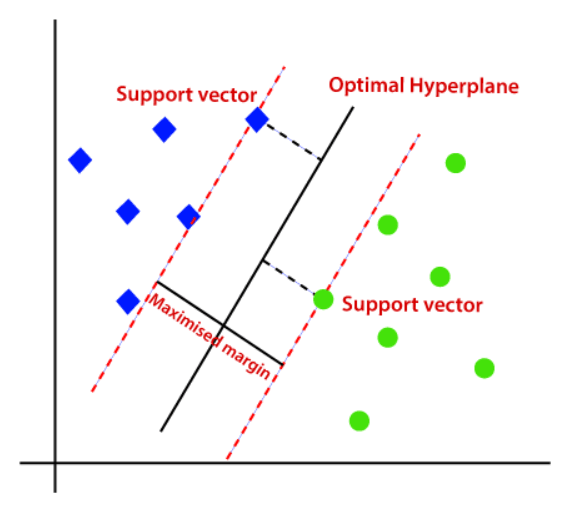

### Maximizing Margin 📏

The primary goal of SVM is to maximize the margin, which is the distance between the hyperplane and the nearest data points (support vectors). This margin maximization helps in improving the model's generalization and robustness. It's like finding the widest "safety buffer" between classes! 📏🔍

### Kernel Trick 🌟

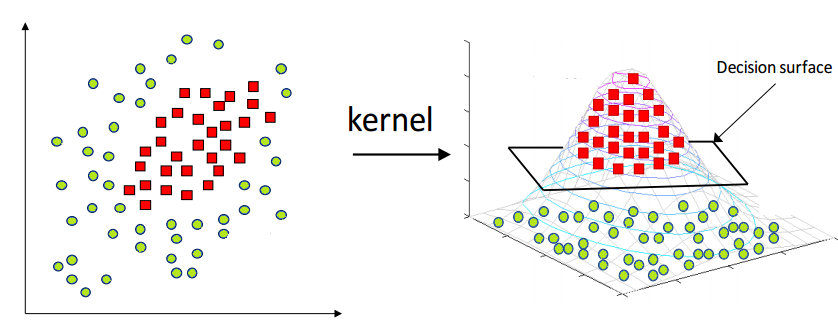

SVM can handle complex, non-linear relationships in the data by using the kernel trick. It transforms the original feature space into a higher-dimensional space, making it possible to find a linear hyperplane in the transformed space. This is like seeing patterns in data that aren't visible in the original view! 🌀🌌

## Types of SVM 🧩

SVM comes in various flavors:
- **C-SVM**: For classification tasks, where C represents the regularization parameter.
- **Nu-SVM**: Provides a more flexible approach to control the number of support vectors.
- **SVR (Support Vector Regression)**: For regression tasks, where the goal is to fit a hyperplane that best approximates the data.

## Advantages of SVM 🌈

SVM offers several advantages:
1. **Effective in High-Dimensional Spaces**: It performs well even in datasets with a high number of features.
2. **Versatility**: It can handle both linear and non-linear data.
3. **Robustness**: SVM is less affected by outliers compared to some other algorithms.
4. **Global Optimization**: SVM seeks the global optimum, reducing the risk of getting stuck in local optima.

## Challenges and Considerations ⚠️

While SVM is a powerful tool, here are some considerations:
1. **Hyperparameter Tuning**: Careful tuning of hyperparameters like the choice of kernel and regularization strength is crucial.
2. **Interpretability**: SVM models can be less interpretable compared to simpler models like linear regression.

## Tips for Using SVM Effectively 💡

1. Explore different kernels (e.g., linear, polynomial, radial basis function) to find the one that best fits your data.
2. Normalize or scale your features, especially when using non-linear kernels.
3. Consider using techniques like grid search or cross-validation for hyperparameter tuning.

## Conclusion 🎉

Support Vector Machines are a valuable addition to your machine learning toolkit. Whether you're working on classification or regression problems, SVM can provide robust and accurate solutions, making it a superhero algorithm in the world of data science! 💥🚀

## Importing Libraries

In [1]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import svm

## Dataset
### Data Preprocessing
Data Preprocessing is a technique that is used to convert the raw data into a clean data set. In other words, whenever the data is gathered from different sources it is collected in raw format which is not feasible for the analysis.

In [2]:
df = pd.read_csv('iris.csv') # Load the data
df.head() # Show the first 5 rows of the data set

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
df.columns = df.columns.str.lower() # Convert column names to lowercase
df.head() 

,id,sepallengthcm,sepalwidthcm,petallengthcm,petalwidthcm,species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df.describe().round() # Show the descriptive statistics of the data set

,id,sepallengthcm,sepalwidthcm,petallengthcm,petalwidthcm
count,150.0,150.0,150.0,150.0,150.0
mean,76.0,6.0,3.0,4.0,1.0
std,43.0,1.0,0.0,2.0,1.0
min,1.0,4.0,2.0,1.0,0.0
25%,38.0,5.0,3.0,2.0,0.0
50%,76.0,6.0,3.0,4.0,1.0
75%,113.0,6.0,3.0,5.0,2.0
max,150.0,8.0,4.0,7.0,2.0


In [5]:
df.isnull().sum() # Check for missing values    

id               0
sepallengthcm    0
sepalwidthcm     0
petallengthcm    0
petalwidthcm     0
species          0
dtype: int64

In [6]:
df.duplicated().sum() # Check for duplicate values

0

In [7]:
df.corr(numeric_only=True) # Check for correlation between variables

,id,sepallengthcm,sepalwidthcm,petallengthcm,petalwidthcm
id,1.000000,0.716676,-0.397729,0.882747,0.899759
sepallengthcm,0.716676,1.000000,-0.109369,0.871754,0.817954
sepalwidthcm,-0.397729,-0.109369,1.000000,-0.420516,-0.356544
petallengthcm,0.882747,0.871754,-0.420516,1.000000,0.962757
petalwidthcm,0.899759,0.817954,-0.356544,0.962757,1.000000


In [8]:
df.drop(['id'], axis=1, inplace=True) # Drop the id column from the data set because it is not needed

## Exploratory Data Analysis
Exploratory Data Analysis (EDA) is an approach to analyzing data sets to summarize their main characteristics, often with visual methods.

### Bar Plot
Bar plot is used to represent the categorical data using rectangular bars where the length of the bar is proportional to the value of the variable.

<Axes: xlabel='species', ylabel='sepallengthcm'>

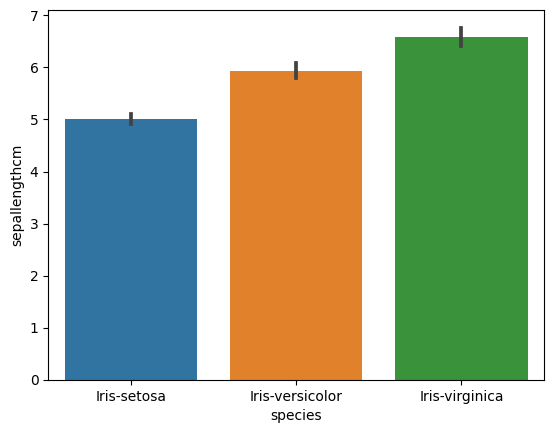

In [9]:
sns.barplot(x='species', y='sepallengthcm', data=df) # Plot the bar chart of the species and sepal length

<Axes: xlabel='species', ylabel='sepalwidthcm'>

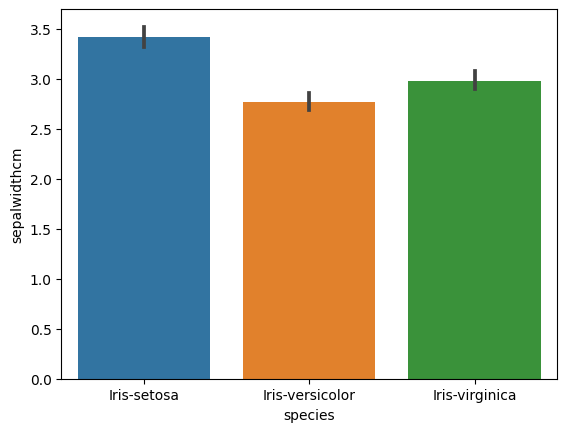

In [10]:
sns.barplot(x='species', y='sepalwidthcm', data=df) # Plot the bar chart of the species and sepal width

<Axes: xlabel='species', ylabel='petallengthcm'>

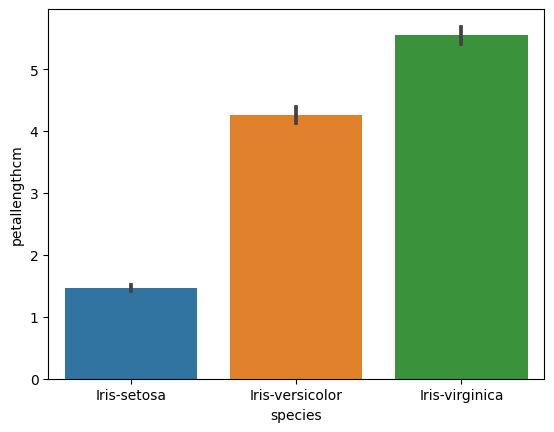

In [11]:
sns.barplot(x='species', y='petallengthcm', data=df) # Plot the bar chart of the species and petal length

<Axes: xlabel='species', ylabel='petalwidthcm'>

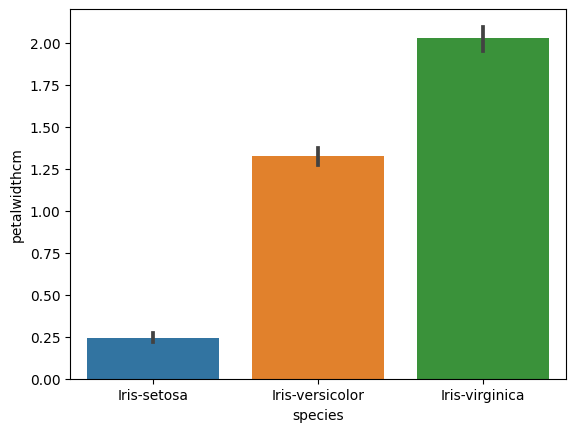

In [12]:
sns.barplot(x='species', y='petalwidthcm', data=df) # Plot the bar chart of the species and petal width

### Heat Map
Heat Map is used to find out the correlation between different features in the dataset. It is represented in a graphical format where individual values that are contained in a matrix are represented as colors.

<Axes: >

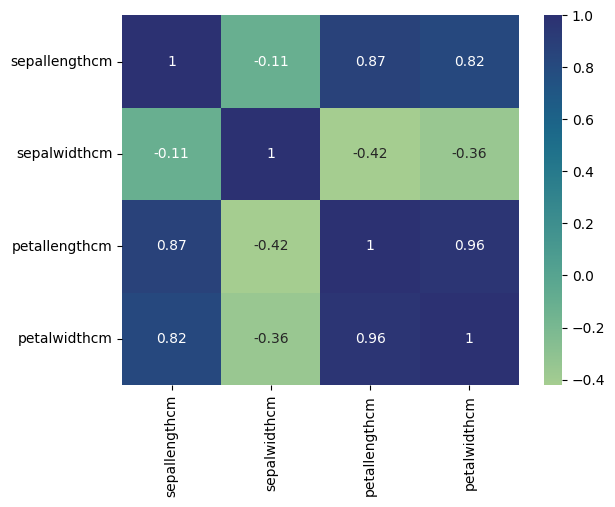

In [13]:
sns.heatmap(df.corr(numeric_only=True), cmap='crest', annot=True) # Plot the heatmap of the correlation between variables

### Pair Plot
Pair Plot is used to visualize the relationship between different variables in the dataset matrix. It also helps to find out the best set of features to explain the relationship between two variables.

c:\Users\EliteBook\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


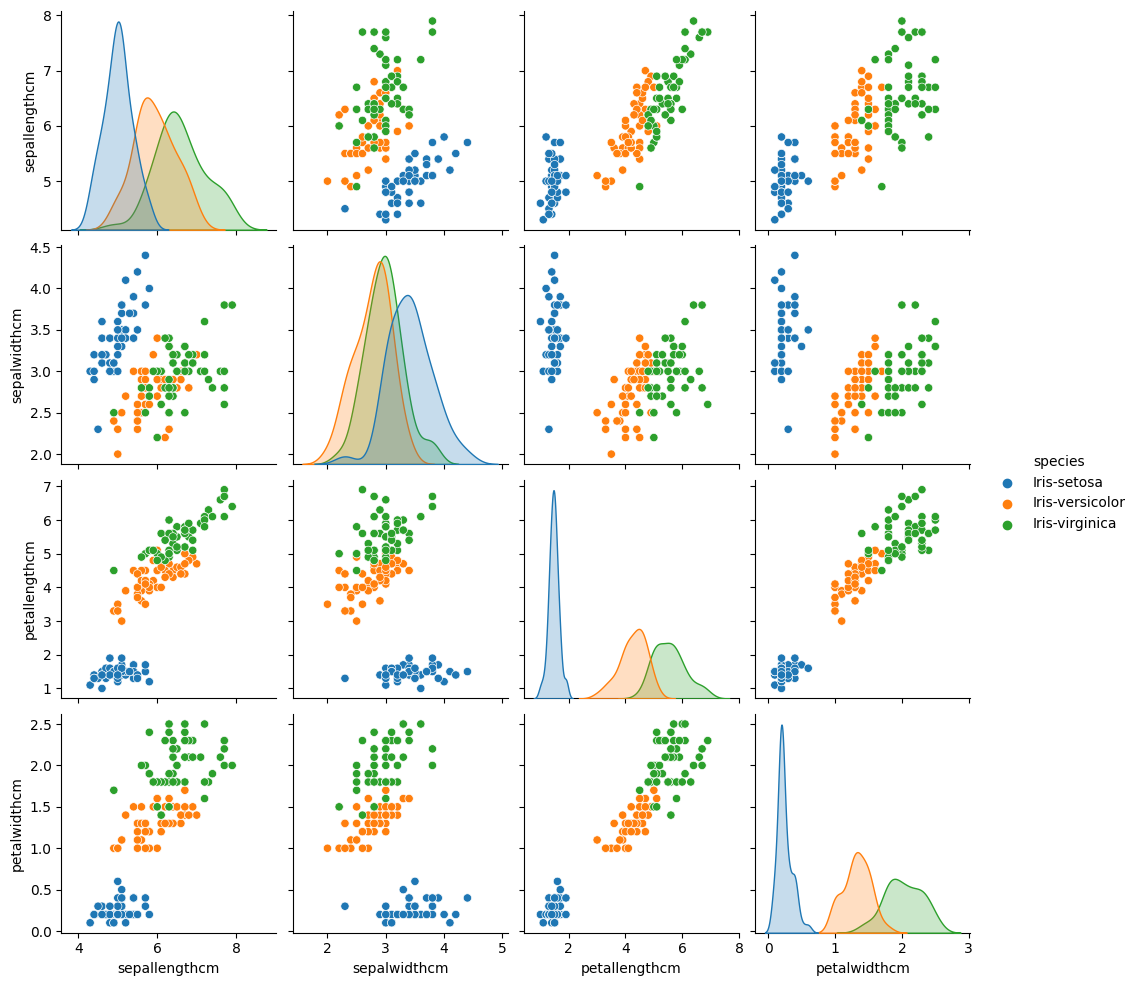

In [14]:
sns.pairplot(df, hue = 'species') # Plot the pairplot of the data set

## Data Splitting
Data Splitting is a very important concept in Machine Learning, it is basically splitting the dataset into training, testing, and validation dataset. The model is trained on the training dataset and evaluated using the testing dataset. The validation dataset is used to evaluate the model during the hyperparameter tuning.

In [15]:
x = df.drop(['species'], axis=1) # Assign the independent variables to x
y = df['species'] # Assign the dependent variable to y

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42) # Split the data set into training and testing sets

In [16]:
len(x_train), len(x_test), len(y_train), len(y_test) # Check the length of the training and testing sets

(120, 30, 120, 30)

## Data Scaling
Data Scaling is a technique that is used to standardize the data within a particular range. It is also known as data normalization. In other words, it is used to transform the data in a particular range like 0 to 1. It is very important to scale the data before training the model.

In [17]:
sc = StandardScaler() # Create an instance of the StandardScaler class
sc.fit(x_train) # Fit the training data to the StandardScaler object

x_train = sc.transform(x_train) # Transform the training data
x_test = sc.transform(x_test) # Transform the testing data

print('After scaling the data set:\n')
print(pd.DataFrame(x_train, columns=x.columns).head()) # Show the first 5 rows of the scaled training data set


After scaling the data set:

   sepallengthcm  sepalwidthcm  petallengthcm  petalwidthcm
0      -1.473937      1.220379      -1.563987     -1.309484
1      -0.133071      3.020017      -1.277280     -1.042922
2       1.085898      0.095606       0.385621      0.289886
3      -1.230143      0.770470      -1.219939     -1.309484
4      -1.717731      0.320560      -1.391963     -1.309484


## SVM
Support Vector Machine is a supervised machine learning algorithm that is used for both classification and regression. But, it is mostly used for classification problems. In this algorithm, we plot each data item as a point in n-dimensional space with the value of each feature being the value of a particular coordinate. Then, we perform classification by finding the hyper-plane that differentiates the two classes very well.

In [18]:
model = svm.SVC() # Create the SVM model
model.fit(x_train, y_train) # Fit the model to the training data

SVC()

In [19]:
prediction = model.predict(x_test) # Predict the species of the testing data
from sklearn import metrics
print('The Accuracy of the SVM model is:', model.score(x_test, y_test)*100, '%') # Print the accuracy of the model

The Accuracy of the SVM model is: 100.0 %
